# Неделя 1. Пятница

In [12]:
import pandas as pd
import numpy as np
import scipy.stats as st
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
transactions = pd.read_csv('aux/transactions.csv').drop('Unnamed: 0', axis=1)
users = pd.read_csv('aux/users.csv').drop('Unnamed: 0', axis=1)

In [6]:
transactions.head(3)

,transaction_id,user_id,date,revenue,group
0,6776893763,3392612285,2017-06-15,3758.2,B
1,40289040,8006342366,2017-06-15,1518.7,B
2,1256395556,966904442,2017-06-15,778.4,A


In [7]:
users.head(3)

,date,group,count_users
0,2017-06-01,A,1016.0
1,2017-06-02,A,868.0
2,2017-06-03,A,704.0


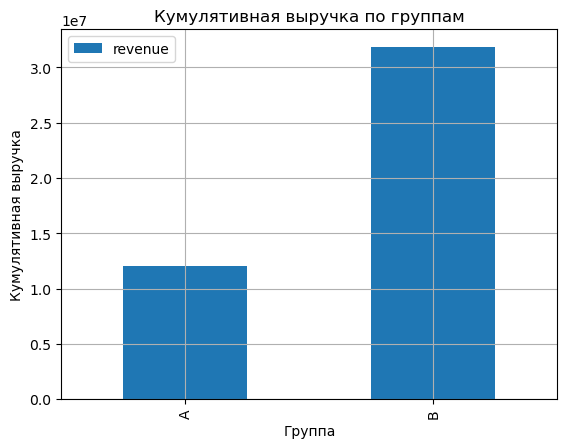

In [15]:
cumulative_revenue = transactions.groupby('group').agg({'revenue': 'sum'}).cumsum()
cumulative_revenue.plot(kind='bar')
plt.title('Кумулятивная выручка по группам')
plt.xlabel('Группа')
plt.ylabel('Кумулятивная выручка')
plt.grid()
plt.show()

1. Постройте график кумулятивной выручки по группам. Опишите выводы

2. Постройте график кумулятивного среднего чека по группам. Опишите выводы

3. График относительного изменения кумулятивного среднего чека группы B к группе A. Опишите выводы

4. График кумулятивного среднего количества заказов по группам. 

5. График относительного изменения кумулятивного среднего количества заказов группы B к группе A

6. Распределение количества заказов по пользователям.  Опишите выводы

7. Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.

8. Постройте распределение стоимостей заказов. Сделайте выводы и предположения.

9. Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.

10. Посчитайте статистическую значимость различий в среднем количестве заказов между группами по «сырым» данным. Сделайте выводы и предположения.

11. Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.

12. Посчитайте статистическую значимость различий в среднем количестве заказов между группами по «очищенным» данным. Сделайте выводы и предположения.

13. Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.

14. Примите решение по результатам теста и объясните его. Варианты решений:   
*  Остановить тест, зафиксировать победу одной из групп.  
*  Остановить тест, зафиксировать отсутствие различий между группами.  
*  Продолжить тест.